In [ ]:
## ICE TASK 1

In [63]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten,
Dense, Dropout, Activation)
from keras.preprocessing import image
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
dataset = '/content/drive/My Drive/Colab_Notebooks/Pics'

In [25]:
train_gen = ImageDataGenerator(rescale=1.0/255.0,
                                   shear_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)


In [26]:
train_data = train_gen.flow_from_directory(
    dataset,
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'binary',
    subset = 'training')

test_data = train_gen.flow_from_directory(
    dataset,
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'binary',
    subset = 'validation')

Found 8 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [54]:
model = Sequential()

## first layer
model.add(Conv2D(32, (3, 3), input_shape = (100, 100, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

## second layer - to increase model performance and accuracy
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

## third layer - for further optimization
## model.add(Conv2D(64, (3, 3), activation = 'relu'))
## model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))

##model.add(Dropout(0.5))

# output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [55]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [56]:
## fit dataset

history = model.fit(train_data,
          epochs = 25,
          validation_data = test_data)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.7365
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step - accuracy: 0.8750 - loss: 0.5661 - val_accuracy: 0.5000 - val_loss: 0.6549
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step - accuracy: 1.0000 - loss: 0.3584 - val_accuracy: 0.5000 - val_loss: 0.5596
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step - accuracy: 1.0000 - loss: 0.2645 - val_accuracy: 0.5000 - val_loss: 0.8162
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step - accuracy: 1.0000 - loss: 0.1676 - val_accuracy: 0.5000 - val_loss: 0.7919
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step - accuracy: 1.0000 - loss: 0.1291 - val_accuracy: 0.5000 - val_loss: 0.8599
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step - accuracy: 1.0000 - loss: 0.0844 - val_accuracy: 0.5000 - val_loss: 1.7056
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - accuracy: 1.0000 - loss: 0.0798 - val_accuracy: 0.5000 - val_loss: 1.

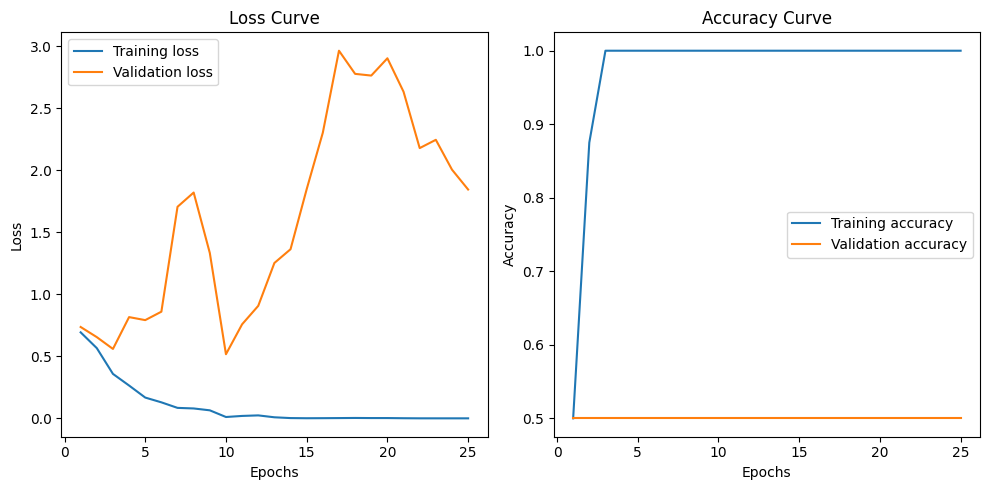

In [57]:
## Training and Validation Loss/Accuracy Plots
loss = history.history['loss']
accuracy = history.history ['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.plot(range(1, len(loss) + 1), loss, label = 'Training loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label = 'Validation loss')
plt.title("Loss Curve")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, len(accuracy) + 1), accuracy, label = 'Training accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label = 'Validation accuracy')
plt.title("Accuracy Curve")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.tight_layout()
plt.show()

In [58]:
## TERRIBLE ): this model is overfitting and cannot
## generalise on unseen data. grsntrd as the dataset is SO SMALL

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Not Nicolas Cage:


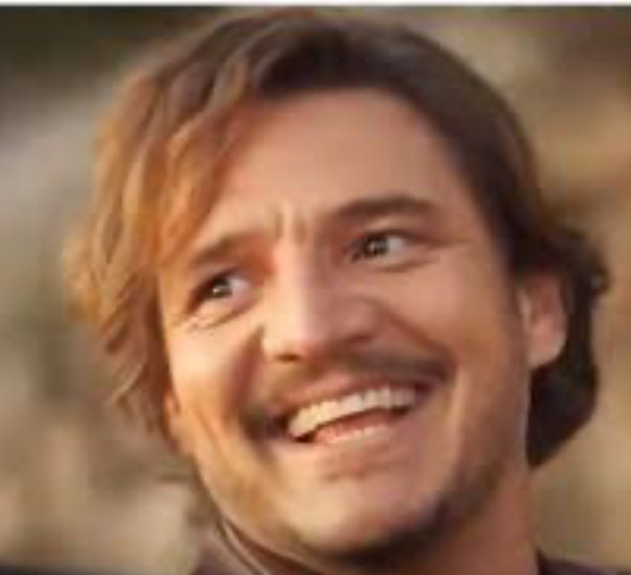

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Nicolas Cage:


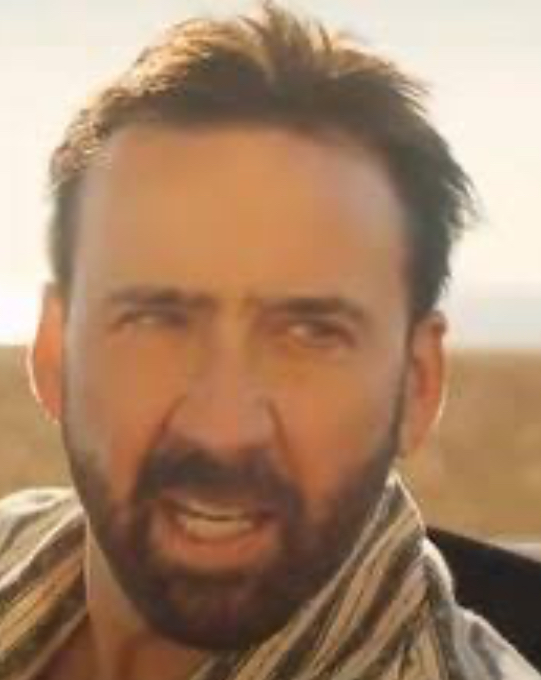

In [69]:
predict = '/content/drive/My Drive/Colab_Notebooks/Predict'

for file in os.listdir(predict):
  file_path = os.path.join(predict, file)
  test_image = image.load_img(file_path, target_size = (100, 100))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)

  result = model.predict(test_image)
  train_data.class_indices
  if result[0][0] == 1:
    prediction = 'Nicolas Cage:'
  else:
    prediction = 'Not Nicolas Cage:'

  print(prediction)
  img = Image(file_path, width = "400", height = "400")
  display(img)

In [ ]:
## OMG :,) IT ACTUALLY WORKED!!!

## The above code was a combination of:

## 1. https://saturncloud.io/blog/how-to-show-image-from-folder-in-google-colab/
## 2. https://medium.com/@raguwing/face-recognition-using-cnn-architecture-in-python-f3c302c2164f
## 3. https://github.com/DrewScatterday/Nicolas_Cage/blob/master/Nic_Cage_SourceCode.ipynb
## 4. ChatGPT